## Load Dataset

In [216]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [218]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [219]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value
df.dropna(inplace=True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode 

In [220]:
# Task2 deal with categorical features
# Tip df.Gender=df.Gender.map({'Male':1,'Female':0})
from itertools import count
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', "Property_Area", "Loan_Status"]:
    features = set(df[column].to_list())
    if features:
        features_map = {feature: id for feature, id in zip(sorted(features), count())}
        print(f"{column}: {features_map}")
        df[column] = df[column].map(features_map)
df.head()
    

Gender: {'Female': 0, 'Male': 1}
Married: {'No': 0, 'Yes': 1}
Dependents: {'0': 0, '1': 1, '2': 2, '3+': 3}
Education: {'Graduate': 0, 'Not Graduate': 1}
Self_Employed: {'No': 0, 'Yes': 1}
Property_Area: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status: {'N': 0, 'Y': 1}


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


## Data process

In [221]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization

# divide columns into X and y
col_size = df.shape[1]
X = df.iloc[:, 0: col_size - 1]
y = df.iloc[:, col_size - 1: col_size]

X.shape, y.shape

((480, 11), (480, 1))

In [222]:
# normalization
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    X[column] = (X[column] - X[column].mean()) / X[column].std()

# Well, This one seems important...
X['Credit_History'] = X['Credit_History'] * 10

# insert a column of all ones as constant term
X.insert(0, 'Ones', 1)

# drop some little relavant columns
X.drop(columns=["Gender"], inplace=True)

X.head()

,Ones,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,-0.137826,-0.027923,-0.207872,0.275254,10.0,0
2,1,1,0,0,1,-0.417101,-0.604003,-0.977981,0.275254,10.0,2
3,1,1,0,1,0,-0.490668,0.296791,-0.307241,0.275254,10.0,2
4,1,0,0,0,0,0.112163,-0.604003,-0.046398,0.275254,10.0,2
5,1,1,2,0,1,0.009310,0.998936,1.518661,0.275254,10.0,2


In [223]:
y.head()

,Loan_Status
1,0
2,1
3,1
4,1
5,1


In [224]:
# 80% for training, 20% for testing
row_size = df.shape[0]
training_sets_size = row_size * 4 // 5

X_train = X.iloc[: training_sets_size, :]
X_test = X.iloc[training_sets_size: , :]
y_train = y.iloc[: training_sets_size, :]
y_test = y.iloc[training_sets_size: , :]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((384, 11), (384, 1), (96, 11), (96, 1))

## Train

In [225]:
from Logistic import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
# Task4 train your model and plot the loss curve of training

# model training
X_train = np.matrix(X_train.values)
y_train = np.matrix(y_train.values)
classifier = LogisticRegression(penalty="l2" ,gamma=1)
theta, costs = classifier.fit(X_train, y_train)
theta, len(costs)

(matrix([[-0.04046621, -0.00513809, -0.01290873, -0.01792366, -0.01207855,
          -0.02005869,  0.00105959, -0.03977641, -0.02131435,  0.12926725,
          -0.03501246]]),
 804)

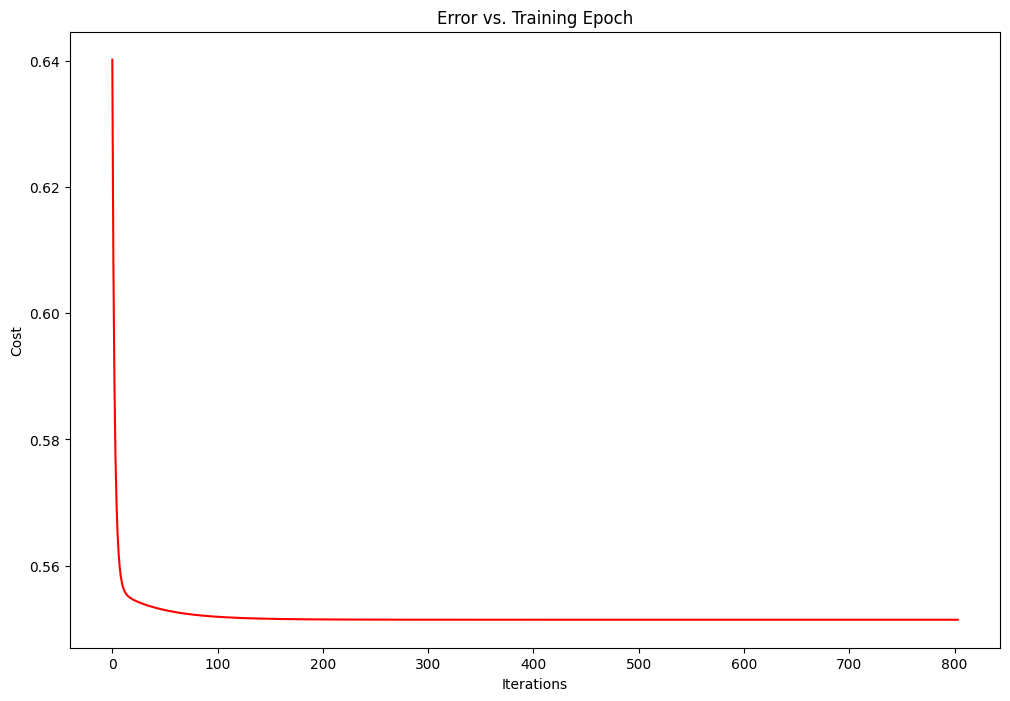

In [226]:
# loss curve
# from andrew ng machine learning homework
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(len(costs)), costs, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## Test

In [227]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()[0]
actuals = y_test.T.values.tolist()[0]

accuracy = sum((1 if predict > 0.5 else 0) == actual for predict, actual in zip(predicts, actuals)) / len(actuals)
print(f"accuracy = {accuracy}")
    

accuracy = 0.8333333333333334


Let's try with different learning rate

In [228]:
classifier = LogisticRegression(penalty="l2" ,gamma=1)
theta, costs = classifier.fit(X_train, y_train, lr=0.1)
theta, len(costs)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()[0]
actuals = y_test.T.values.tolist()[0]

accuracy = sum((1 if predict > 0.5 else 0) == actual for predict, actual in zip(predicts, actuals)) / len(actuals)
print(f"accuracy = {accuracy}", f"len(costs) = {len(costs)}")

accuracy = 0.8333333333333334 len(costs) = 98


Let's try with different gamma for penalty

In [229]:
classifier = LogisticRegression(penalty="l2" ,gamma=5)
theta, costs = classifier.fit(X_train, y_train)
theta, len(costs)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()[0]
actuals = y_test.T.values.tolist()[0]

accuracy = sum((1 if predict > 0.5 else 0) == actual for predict, actual in zip(predicts, actuals)) / len(actuals)
print(f"accuracy = {accuracy}")

accuracy = 0.75


Let's try L1 penalty

In [230]:
classifier = LogisticRegression(penalty="l1" ,gamma=0.001)
theta, costs = classifier.fit(X_train, y_train)
theta, len(costs)

predicts = classifier.predict(np.matrix(X_test.values))
predicts = predicts.T.tolist()[0]
actuals = y_test.T.values.tolist()[0]

accuracy = sum((1 if predict > 0.5 else 0) == actual for predict, actual in zip(predicts, actuals)) / len(actuals)
print(f"accuracy = {accuracy}")

accuracy = 0.8020833333333334
